In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q-internal', 'deployed', 'default')

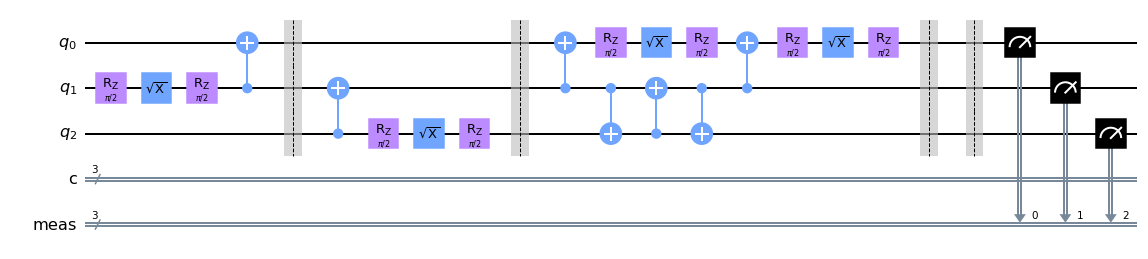

In [6]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

layers = 16

circuit_array = []

#each circuit has one more layer of gates than the last
for i in range(layers):

    circuit = QuantumCircuit(3, 3)

    # the numbers represent the circuit layer
    if i >= 0:
        circuit.rz(pi/2, 1)
    if i >= 1:
        circuit.sx(1)
    if i >= 2:
        circuit.rz(pi/2, 1)
    if i >= 3:
        circuit.cx(1, 0)
        circuit.barrier(2, 1, 0)
    if i >= 4:
        circuit.cx(2, 1)
    if i >= 5:
        circuit.rz(pi/2, 2)
    if i >= 6:
        circuit.sx(2)
    if i >= 7:
        circuit.rz(pi/2, 2)
        circuit.barrier(2, 1, 0)
    if i >= 8:
        circuit.cx(1, 0)
    if i >= 9:
        circuit.rz(pi/2, 0)
        circuit.cx(1, 2)
    if i >= 10:
        circuit.sx(0)
        circuit.cx(2, 1)
    if i >= 11:
        circuit.rz(pi/2, 0)
        circuit.cx(1, 2)
    if i >= 12:
        circuit.cx(1, 0)
    if i >= 13:
        circuit.rz(pi/2, 0)
    if i >= 14:
        circuit.sx(0)
    if i >= 15:
        circuit.rz(pi/2, 0)

    # do to every circuit
    circuit.barrier(0, 1, 2)
    circuit.measure_all()
    circuit_array.append(circuit)

circuit_array[15].draw()

In [16]:
backend = provider.get_backend('ibmq_mumbai')
# backend = Aer.get_backend('qasm_simulator')
shots = 8192
job = execute(circuit_array, backend, shots=shots, memory=True)
result = job.result()

{'000': 1965, '001': 12, '010': 16, '011': 2, '100': 53}


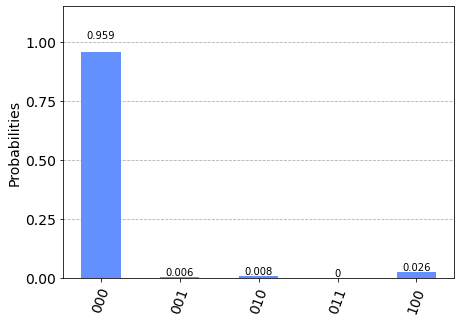

In [17]:
# use this cell with a simulated backend to create a key for each circuit
exp_counts = result.get_counts(circuit_array[0])
print(exp_counts)
plot_histogram(exp_counts)

In [18]:
def storeOutputs(circuitMemory):
    # need an array to drop all the results into
    outputArray = []
    #convert results to int and drop into array
    for x in range(0, shots):
        converted = int(memory[x], 2)
        outputArray.append(converted)
    
    return outputArray

In [19]:
finalOutput = []
for i in range(layers):
    memory = result.get_memory(i)
    storeOutputs(memory)
    finalOutput.append(storeOutputs(memory))

In [21]:
%%capture cap --no-stderr
print(finalOutput)

In [22]:
with open('teleportation-disk-final-data.txt', 'w') as f:
    f.write(cap.stdout)